# Homework 5 - Naiara Alonso Montes

## Exercise 1
*Validate that the provided code does what it promises to do and that you can get the code running (of course, you can use your own computer for running it). Hopefully it calculates the k-NN correctly. Use k=10 for validations. Validate that the libraries provide correct answers. Study the effect of distance measure used, by interpreting what are their differences, and whether one or other method should be used. Use at least two of the provided distances - the Euclidean distance, Manhattan distance, cosine distance. In short - analyze and run the code. So that you can use it for the below tasks.*


This is the image I have used for testing this first exercise:

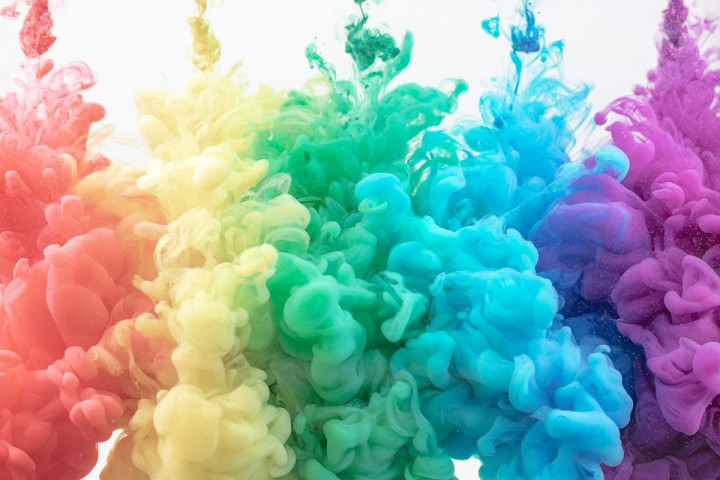

The method to check that library and explicit functions have the same behaviour is to set a random seed, for reproducibility and to redirect both outputs to a file and check if there are any differences between them using the command `diff`. As the output was the same for all pair of functions, the code was working well.

These are the average distances for every model (just library):

| Model     | (1, 1) | (1, 3) | (3, 4) |
| --------- | ------ | ------ | ------ |
| Euclidean | 0.336  | 2.088  | 10.690 |
| Manhattan | 0.409  | 2.634  | 12.778 |
| Cosine    | 0.000  | 0.000  | 0.000  |

What we observe for this results is that, Euclidean distance has a smaller value compared to Manhattan, as it can be expected. On the other hand, for Cosine similarity makes no sense always returning 0, I couldn't find the error, so I'll discard all metrics for this measure.



## Exercise 2
*Implement one (any) indexing method (explicit code), with two goals:*
1.  *Get it running correctly (at least on smaller dimensions like 3D, 6D ..)*
2. *Get it running faster than the full search - report whether and how you achieved it.*
*Report, which method you chose for indexing, and how does it work.*

With the aid of ChatGPT, I manage to create an approach to produce faster seach using a KD-Tree. A KD-Tree is a binary tree which each node representing a K-Dimensional point in space. My approach works for all dimensions.

To understand the results it is important to understand the time complexities.

**Brute force method**
- There is not time overhead due to the construction of any structure.
- The time to calculate the disances is proportional to the number of dimensions. For a space of $d$ dimensions and $n$ points in the dataset the time-complexity is $O(n ⋅ d)$.
- Total complexity for out implementation is $O(n ⋅ d)$


**KD-Tree**
- The construction of the tree itselft has a time-complexity of $O(n \log n)$, with $n$ equal to the points in the dataset.
- The search for the nearedt-neighbour divides depending on the query dimensions, I will take the high-dimensions for reference, which is $O(n^{1 - \frac{1}{d}})$.
- In overall, when dimensions increase, the trendiness of this time-complexity is $O(n)$.

The obtained results are shown in different plots.

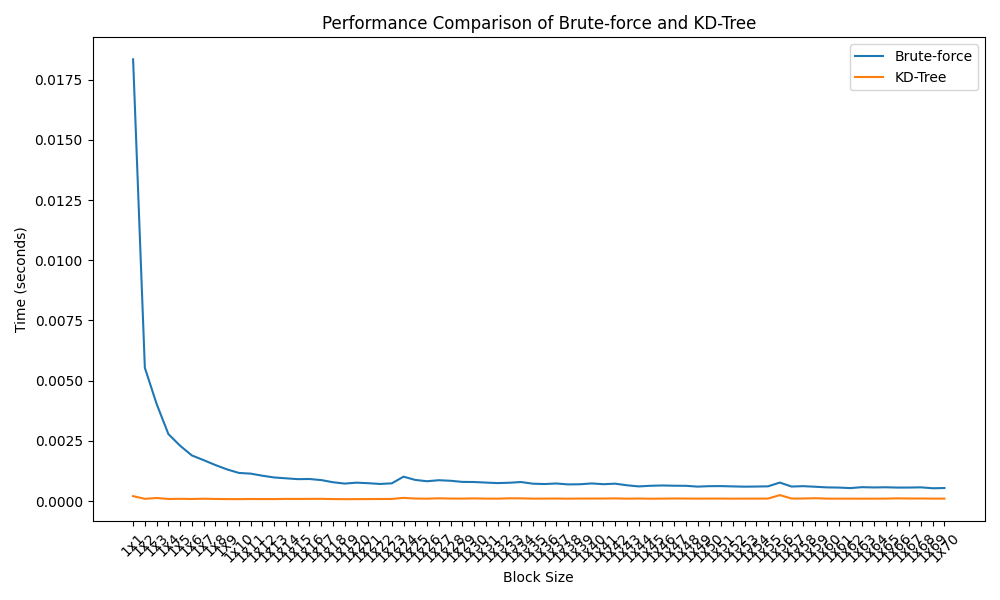

This plot shows the time results for both approaches from 1 pixel (3 dimensions) to 70 pixels (210) dimensions. As seen, the KD-Tree performs better for all dimensions, and remains stable. The brute force approach performs worst for low dimensional data.

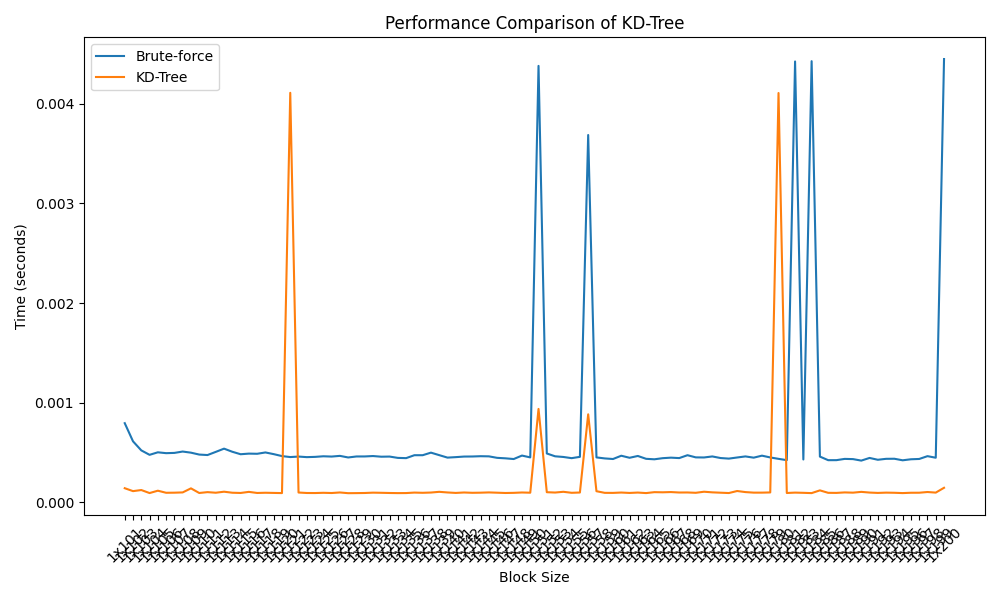

This plot shows that for high dimensional data, from 300 to 600 dimensions, both aproaches estabilize. According to theoretical analysis, a high dimensionality will affect the performance, which in real-life we see that it is not true.


## Exercise 3
*Explain how to implement Random Projection tree on the provided task. How large it would grow (how many nodes, estimate space). Describe what would one node look like, what should be stored in each tree node. Explain how the k-NN search would work for k=1, k=10, k=100. What would the simplest implementation possibly look like for you? Remember - there is the indexing phase but also the usage phase supporting queries (that may not even be in the index previously).
Provide your own illustrations to explain how the RP-tree based search would work. You can also use the example shown in the lecture https://colab.research.google.com/drive/1CFJsdcQ9rQ3DSPpCF-B8TSJK6QmOOdnN as the basis. Feel free to use and modify, if useful.*

To implement a Random Projection tree I would use the redimensioned data after the PCA execution, as it has already 2 dimensions. I created a code that is able to create the RP-tree recursively by adding new nodes for each left-right division; and using `matplotlib` represents the partitions. As it is executed on every recursion call, it generates so much overhead (that is why it is commented on the code). Here are some of the first iterations results:

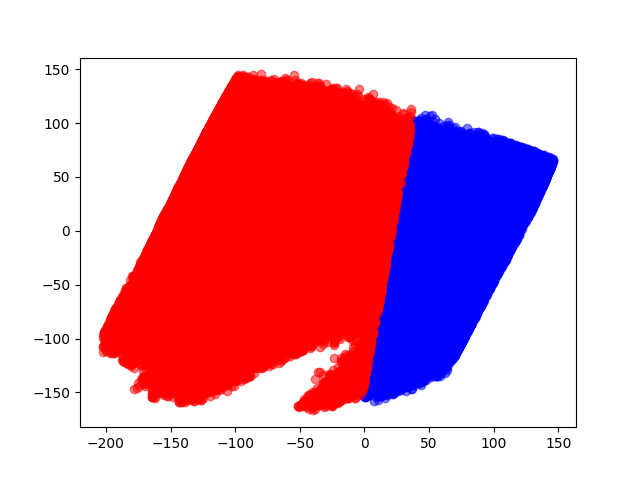

For first iteration, the division vector/line is quite easy to appreciate.

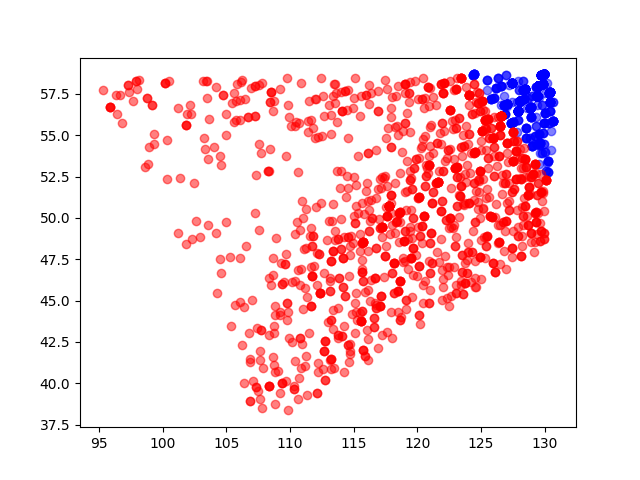

This plot is for a few iterations later, where fewer points are represented. Still the difference or left/right partition is obvious.

My nodes have the following fields:
- random vector
- median
- left data
- right data

And all 3 different block sizes I got the total nodes of each tree, which are:

| (1, 1) | (1, 3) | (3, 4) |
| ------ | ------ | ------ |
| 50175  | 66770  | 70907  |

According to this values, the larger the block the most nodes, which might seem contra-intuitive as there are fewer blocks in larger nodes.

Regarding the data space (which I think it refers to the storage space), it is really hard to measure as it depends on the number of points in each size. I can create a formula that can predict that storage space, if we consider each of the points as 2 floats, same to the random vector and one single float for the median. Float values are 4 B.

$$\text{Number of bytes per tree} = (\text{nº of nodes} ⋅ (3 ⋅ 4)) + ∑\text{elements in all left lists} ⋅ (4 ⋅ 2) + ∑\text{elements in all right lists} ⋅ (4 ⋅ 2)$$


For a $k$ greater than 1, the RP-tree it is suposed to save a priority queue to store the closest $k$ points.

## Exercise 4
*Experiment with the code and methods - how large data can be analyzed with these methods, what is the effect of different indexing methods compared to no indexing. What is the effect of dimensionality, and distance measures? Note that you can increase the volume and dimensionality of data easily. Ask yourself 3-4 questions and provide answers to them. Report the chosen used methods, the data sizes, the speed of the methods. Argue, which methods are your favorites, when and why.*

- How does the size affect the speed?

This has been answered in question 2, an as seen, the time tends to be lower as the block size increases.

- What is the impact of dimensionality reduction?

Thanks to ChatGPT, I got to a code that compares the PCA transformation and performs different measures, the most important one is the explained variance, which returns a percentage, which is 91.83%. That means that after the transformation, what percentage of data is preserved. A value higher than 90% is considered a good performance.

- Which indexing method is the best?

For exercise 2 we already have implemented a KD-Tree, now I will create a ball-tree. This is the obtained plot:

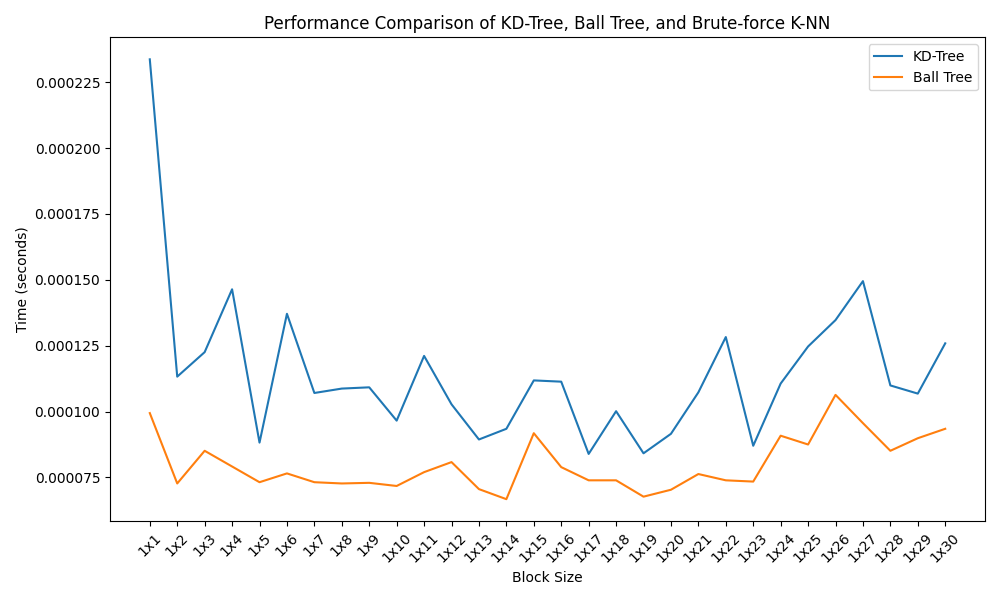

As seen in the plot, the ball-tree provides a better time performance, which it is oppose to general belief as ball-tree usually performs better for low dimensional data, whereas in my case it performs better always.


## Exercise 5
*We used image data so far merely as a source of experimental data. Discuss what applications and benefits such similarity searches would offer for image processing tasks. Identify some potential tasks and state which methods would be most useful. Think both in terms of single pixels, as well as longer areas/cvectors across larger blocks. How does the dimensionality and distance measure affect the expected results? Which other distance measures could be used, what would be their preferred use cases.*

For a single pixel distance can be used for example to detect is an image has been modified. For example, for a single color distance, if it is not 0 for all pixels, the image it is likely for have been modified.

For a block of pixels, it can be used image comparison. A user can upload an image and the system can return the ones with the least distance.

Also it can be used for medical porpuses by comparing a block of pixels to detect patologies, comparing regions of a new image to one that has been considered a patologie or anomaly. One example is been described [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3043681/).



In [1]:
!jupyter nbconvert --to html HW5.ipynb

[NbConvertApp] Converting notebook HW5.ipynb to html
[NbConvertApp] Writing 809751 bytes to HW5.html
